In [27]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from keras import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
X, y = load_iris(return_X_y=True)

In [4]:
print(X.shape)
print(X[:10])
print(y.shape)
print(y[:10])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150,)
[0 0 0 0 0 0 0 0 0 0]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [8]:
print(x_train.shape)
print(x_train[:10])
print(y_train.shape)
print(y_train[:10])

(120, 4)
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]]
(120,)
[2 1 0 2 2 1 0 1 1 1]


In [10]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
print(y_train_one_hot.shape)
print(y_train_one_hot[:10])

(120, 3)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [18]:
#Creating a model
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, 'softmax'))

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compiling the model 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [21]:
history = model.fit(x_train,
                    y_train_one_hot,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, y_test_one_hot))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.3035 - loss: 3.0058 - val_accuracy: 0.4333 - val_loss: 1.9644
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3254 - loss: 2.7065 - val_accuracy: 0.4333 - val_loss: 1.8182
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3212 - loss: 2.4514 - val_accuracy: 0.4333 - val_loss: 1.6802
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3025 - loss: 2.3560 - val_accuracy: 0.4333 - val_loss: 1.5501
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3004 - loss: 2.1351 - val_accuracy: 0.4333 - val_loss: 1.4307
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3379 - loss: 1.8277 - val_accuracy: 0.4333 - val_loss: 1.3234
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2931 - loss: 1.8024 - val_accuracy: 0.4333 - val_loss: 1.2274
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3098 - loss: 1.6563 - val_accuracy: 0.4333 - val_loss

In [23]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


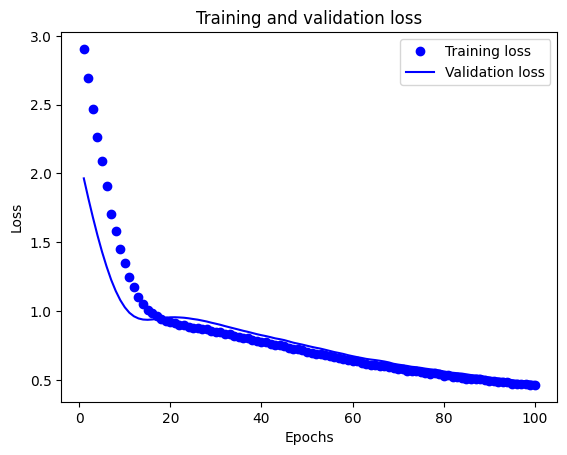

In [25]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Visualize the loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
predictions = model.predict(x_test[:2])
print('ground truth')
print(y_test[:2])
print(y_test_one_hot[:2])
print('prediction')
print(predictions.shape)
print(predictions)
print('argmax')
print(np.argmax(predictions, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ground truth
[2 1]
[[0. 0. 1.]
 [0. 1. 0.]]
prediction
(2, 3)
[[0.0186978  0.20123002 0.7800722 ]
 [0.12921306 0.56189966 0.30888724]]
argmax
[2 1]
